In [151]:
import numpy as np
import pandas as pd

### 1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

In [199]:
df = pd.read_csv('compas-scores.csv', index_col='id', na_values='NaN',  parse_dates= ['compas_screening_date', 'r_offense_date', 'vr_offense_date'])

In [200]:
df.columns

Index(['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age',
       'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'num_r_cases', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'is_violent_recid',
       'num_vr_cases', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date',
       'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'v_screening_date', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date'],
      dtype='object')

In [201]:
df.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,NaT,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,...,NaT,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,...,NaT,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,...,NaT,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


Escogemos únicamente las columnas que nos interesan del csv original

In [202]:
df_filtrado = df[['name', 'age', 'age_cat' ,'sex', 'race', 'compas_screening_date', 'decile_score', 'v_decile_score', 'is_recid', 'r_offense_date', 'is_violent_recid', 'vr_offense_date']]

Convertimos los campos en su formato correspondiente

In [203]:
df_filtrado['name'] = df_filtrado['name'].astype('string')
df_filtrado['sex'] = df_filtrado['sex'].astype('category')
df_filtrado['race'] = df_filtrado['race'].astype('category')
df_filtrado['age_cat'] = df_filtrado['age_cat'].astype('category')
df_filtrado['is_recid'] = df_filtrado['is_recid'].astype('category')
df_filtrado['is_violent_recid'] = df_filtrado['is_violent_recid'].astype('category')


C:\Users\javih\AppData\Local\Temp\ipykernel_22040\112674306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['name'] = df_filtrado['name'].astype('string')
C:\Users\javih\AppData\Local\Temp\ipykernel_22040\112674306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['sex'] = df_filtrado['sex'].astype('category')
C:\Users\javih\AppData\Local\Temp\ipykernel_22040\112674306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [204]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11757 entries, 1 to 11757
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   11757 non-null  string        
 1   age                    11757 non-null  int64         
 2   age_cat                11757 non-null  category      
 3   sex                    11757 non-null  category      
 4   race                   11757 non-null  category      
 5   compas_screening_date  11757 non-null  datetime64[ns]
 6   decile_score           11757 non-null  int64         
 7   v_decile_score         11757 non-null  int64         
 8   is_recid               11757 non-null  category      
 9   r_offense_date         3703 non-null   datetime64[ns]
 10  is_violent_recid       11757 non-null  category      
 11  vr_offense_date        882 non-null    datetime64[ns]
dtypes: category(5), datetime64[ns](3), int64(3), string(1)
memory usa

Realizamos un análisis exploratorio, dándonos cuenta que algunas de las columnas (decile_score, v_decile_score, is_recid) tienen asignados el valor de -1. Suponemos que esto significa que se trata de un NaN.

Esto en efecto se trata de un problema de validez.

In [205]:
df_filtrado.describe()

,age,compas_screening_date,decile_score,v_decile_score,r_offense_date,vr_offense_date
count,11757.000000,11757,11757.000000,11757.000000,3703,882
mean,35.143319,2013-12-13 21:28:07.471293696,4.371268,3.571489,2014-08-27 11:06:31.790440192,2014-10-29 08:04:53.877551104
min,18.000000,2013-01-01 00:00:00,-1.000000,-1.000000,2013-01-03 00:00:00,2013-01-28 00:00:00
25%,25.000000,2013-05-09 00:00:00,2.000000,1.000000,2014-01-14 00:00:00,2014-03-31 06:00:00
50%,32.000000,2013-12-12 00:00:00,4.000000,3.000000,2014-08-27 00:00:00,2014-11-19 00:00:00
75%,43.000000,2014-06-22 00:00:00,7.000000,5.000000,2015-04-04 00:00:00,2015-06-25 18:00:00
max,96.000000,2014-12-31 00:00:00,10.000000,10.000000,2016-03-29 00:00:00,2016-03-13 00:00:00
std,12.022894,NaN,2.877598,2.500479,NaN,NaN


In [206]:
df_filtrado.describe(include='category')

,age_cat,sex,race,is_recid,is_violent_recid
count,11757,11757,11757,11757,11757
unique,3,2,6,3,2
top,25 - 45,Male,African-American,0,0
freq,6649,9336,5813,7335,10875


In [207]:
df_filtrado.head()

,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date
id,,,,,,,,,,,,
1,miguel hernandez,69,Greater than 45,Male,Other,2013-08-14,1,1,0,NaT,0,NaT
2,michael ryan,31,25 - 45,Male,Caucasian,2014-12-31,5,2,-1,NaT,0,NaT
3,kevon dixon,34,25 - 45,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05
4,ed philo,24,Less than 25,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaT
5,marcu brown,23,Less than 25,Male,African-American,2013-01-13,8,6,0,NaT,0,NaT


Solucionamos el problema de validez asignando el mismo formato a los NaN de todo el DataFrame

In [208]:
df_filtrado.loc[df_filtrado['decile_score']==-1, 'decile_score'] = np.nan
df_filtrado.loc[df_filtrado['v_decile_score']==-1, 'v_decile_score'] = np.nan
df_filtrado.loc[df_filtrado['is_recid']==-1, 'is_recid'] = np.nan

In [209]:
df_filtrado.describe()

,age,compas_screening_date,decile_score,v_decile_score,r_offense_date,vr_offense_date
count,11757.000000,11757,11742.00000,11752.000000,3703,882
mean,35.143319,2013-12-13 21:28:07.471293696,4.37813,3.573434,2014-08-27 11:06:31.790440192,2014-10-29 08:04:53.877551104
min,18.000000,2013-01-01 00:00:00,1.00000,1.000000,2013-01-03 00:00:00,2013-01-28 00:00:00
25%,25.000000,2013-05-09 00:00:00,2.00000,1.000000,2014-01-14 00:00:00,2014-03-31 06:00:00
50%,32.000000,2013-12-12 00:00:00,4.00000,3.000000,2014-08-27 00:00:00,2014-11-19 00:00:00
75%,43.000000,2014-06-22 00:00:00,7.00000,5.000000,2015-04-04 00:00:00,2015-06-25 18:00:00
max,96.000000,2014-12-31 00:00:00,10.00000,10.000000,2016-03-29 00:00:00,2016-03-13 00:00:00
std,12.022894,NaN,2.87302,2.499232,NaN,NaN


In [210]:
df_filtrado.describe(include='category')

,age_cat,sex,race,is_recid,is_violent_recid
count,11757,11757,11757,11038,11757
unique,3,2,6,2,2
top,25 - 45,Male,African-American,0,0
freq,6649,9336,5813,7335,10875


Respecto a la integridad, observamos que hay numerosos datos vacíos. No obstante, no todas las columnas deberían tener todos sus datos rellenos: los datos de las columnas r_offense_date y vr_offense_date solo se rellenarán en el caso que is_recid y is_violent_recid sean verdaderos, respectivamente.

Comprobamos que, en efecto, aquí no hay datos vacíos erróneamente. 

In [211]:
df_filtrado[(df_filtrado['is_recid']==1)].count()

name                     3703
age                      3703
age_cat                  3703
sex                      3703
race                     3703
compas_screening_date    3703
decile_score             3701
v_decile_score           3703
is_recid                 3703
r_offense_date           3703
is_violent_recid         3703
vr_offense_date           882
dtype: int64

In [212]:
df_filtrado[(df_filtrado['is_violent_recid']==1)].count()

name                     882
age                      882
age_cat                  882
sex                      882
race                     882
compas_screening_date    882
decile_score             882
v_decile_score           882
is_recid                 882
r_offense_date           882
is_violent_recid         882
vr_offense_date          882
dtype: int64

Aún así seguimos teniendo problemas de integridad y actualidad.

- Integridad debido a que no todas las columnas (exceptuando las discutidas antes) deberían tener un conteo de 11757 observaciones, cosa que no sucede en general. Como todos estos datos se basan en evaluar la capacidad predictiva del sistema COMPAS, no tiene mucho sentido dejar campos donde precisamente no se sabe si la persona ha reincidido o no, por lo que eliminamos a aquellas personas que tengan is_recid no informado.

- Actualidad ya que es posible que algunos detenidos hayan sido reincidentes después de la toma de datos expuesta. La última fecha tomada en la que alguien reincidió es de 2016-03-29. Esto implica que los datos fueron tomados más o menos en esa fecha. Por consiguiente, actualizando la información y con ellos las columnas de is_recid, r_offense_date, is_violent_recid y vr_offense_date, se solventaría este problema.

In [213]:
df_filtrado.dropna(subset='is_recid', inplace=True)

C:\Users\javih\AppData\Local\Temp\ipykernel_22040\4160003591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.dropna(subset='is_recid', inplace=True)


In [214]:
df_filtrado.describe()

,age,compas_screening_date,decile_score,v_decile_score,r_offense_date,vr_offense_date
count,11038.000000,11038,11027.000000,11034.000000,3703,882
mean,35.064686,2013-12-13 16:11:23.602102016,4.411717,3.597517,2014-08-27 11:06:31.790440192,2014-10-29 08:04:53.877551104
min,18.000000,2013-01-01 00:00:00,1.000000,1.000000,2013-01-03 00:00:00,2013-01-28 00:00:00
25%,25.000000,2013-05-09 00:00:00,2.000000,1.000000,2014-01-14 00:00:00,2014-03-31 06:00:00
50%,32.000000,2013-12-12 00:00:00,4.000000,3.000000,2014-08-27 00:00:00,2014-11-19 00:00:00
75%,43.000000,2014-06-22 00:00:00,7.000000,5.000000,2015-04-04 00:00:00,2015-06-25 18:00:00
max,96.000000,2014-12-31 00:00:00,10.000000,10.000000,2016-03-29 00:00:00,2016-03-13 00:00:00
std,11.961052,NaN,2.873770,2.503393,NaN,NaN


Seguimos teniendo problemas de integridad, aún hay casos donde decile_score y v_decile_score están vacíos. Para no generar sesgo evitaremos imputar estos campos, y posteriormente evaluaremos la precisión del sistema únicamente con los datos de los que tengamos todo informado.

In [215]:
df_filtrado.dropna(subset='decile_score', inplace=True)

C:\Users\javih\AppData\Local\Temp\ipykernel_22040\1739004781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.dropna(subset='decile_score', inplace=True)


In [216]:
df_filtrado.describe()

,age,compas_screening_date,decile_score,v_decile_score,r_offense_date,vr_offense_date
count,11027.000000,11027,11027.000000,11027.000000,3701,882
mean,35.053142,2013-12-13 20:22:26.368005888,4.411717,3.597896,2014-08-27 11:17:47.062955776,2014-10-29 08:04:53.877551104
min,18.000000,2013-01-01 00:00:00,1.000000,1.000000,2013-01-03 00:00:00,2013-01-28 00:00:00
25%,25.000000,2013-05-09 00:00:00,2.000000,1.000000,2014-01-14 00:00:00,2014-03-31 06:00:00
50%,32.000000,2013-12-12 00:00:00,4.000000,3.000000,2014-08-27 00:00:00,2014-11-19 00:00:00
75%,43.000000,2014-06-23 00:00:00,7.000000,5.000000,2015-04-04 00:00:00,2015-06-25 18:00:00
max,96.000000,2014-12-31 00:00:00,10.000000,10.000000,2016-03-29 00:00:00,2016-03-13 00:00:00
std,11.952567,NaN,2.873770,2.503672,NaN,NaN


In [217]:
df_filtrado.describe(include='category')

,age_cat,sex,race,is_recid,is_violent_recid
count,11027,11027,11027,11027,11027
unique,3,2,6,2,2
top,25 - 45,Male,African-American,0,0
freq,6272,8764,5498,7326,10145


Finalmente nos quedamos con 11027 datos de los que disponemos toda su información. Cabe recalcar, como se ha dicho antes, que seguramente tendríamos más información si actualizáramos los datos a una fecha posterior, por lo que los problemas de actualidad no se han solventado.

Es hora de evaluar la predictividad.

### 2. ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

Estos campos no evaluan la precisión de las estimaciones de riesgo, necesitamos un campo que nos diga si el sistema COMPAS determina al sujeto como posible reincidente o no. 
Se nos dice que el umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante, por lo que nuestra feature tendrá el valor 1 si dicho valor es igual o superior a 7 y 0 si no.

In [218]:
df_filtrado.loc[df_filtrado['decile_score'] >= 7 ,'pred_recid'] = True
df_filtrado.loc[df_filtrado['decile_score'] < 7 ,'pred_recid'] = False

C:\Users\javih\AppData\Local\Temp\ipykernel_22040\1800372455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[df_filtrado['decile_score'] >= 7 ,'pred_recid'] = True


Misma idea para casos con violencia.

In [219]:
df_filtrado.loc[df_filtrado['v_decile_score'] >= 7 ,'pred_v_recid'] = True
df_filtrado.loc[df_filtrado['v_decile_score'] < 7 ,'pred_v_recid'] = False


C:\Users\javih\AppData\Local\Temp\ipykernel_22040\1440342544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[df_filtrado['v_decile_score'] >= 7 ,'pred_v_recid'] = True


In [220]:
df_filtrado['pred_recid'] = df_filtrado['pred_recid'].astype('category')
df_filtrado['pred_v_recid'] = df_filtrado['pred_v_recid'].astype('category')
df_filtrado.info()
df_filtrado

<class 'pandas.core.frame.DataFrame'>
Index: 11027 entries, 1 to 11757
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   11027 non-null  string        
 1   age                    11027 non-null  int64         
 2   age_cat                11027 non-null  category      
 3   sex                    11027 non-null  category      
 4   race                   11027 non-null  category      
 5   compas_screening_date  11027 non-null  datetime64[ns]
 6   decile_score           11027 non-null  float64       
 7   v_decile_score         11027 non-null  float64       
 8   is_recid               11027 non-null  category      
 9   r_offense_date         3701 non-null   datetime64[ns]
 10  is_violent_recid       11027 non-null  category      
 11  vr_offense_date        882 non-null    datetime64[ns]
 12  pred_recid             11027 non-null  category      
 13  pred_v

C:\Users\javih\AppData\Local\Temp\ipykernel_22040\4164032614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['pred_recid'] = df_filtrado['pred_recid'].astype('category')
C:\Users\javih\AppData\Local\Temp\ipykernel_22040\4164032614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['pred_v_recid'] = df_filtrado['pred_v_recid'].astype('category')


,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,pred_recid,pred_v_recid
id,,,,,,,,,,,,,,
1,miguel hernandez,69,Greater than 45,Male,Other,2013-08-14,1.0,1.0,0,NaT,0,NaT,False,False
3,kevon dixon,34,25 - 45,Male,African-American,2013-01-27,3.0,1.0,1,2013-07-05,1,2013-07-05,False,False
4,ed philo,24,Less than 25,Male,African-American,2013-04-14,4.0,3.0,1,2013-06-16,0,NaT,False,False
5,marcu brown,23,Less than 25,Male,African-American,2013-01-13,8.0,6.0,0,NaT,0,NaT,True,False
6,bouthy pierrelouis,43,25 - 45,Male,Other,2013-03-26,1.0,1.0,0,NaT,0,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,patrick hamilton,47,Greater than 45,Male,Other,2013-09-22,3.0,1.0,0,NaT,0,NaT,False,False
11754,raymond hernandez,22,Less than 25,Male,Caucasian,2013-05-17,7.0,5.0,1,2014-10-11,0,NaT,True,False
11755,dieuseul pierre-gilles,35,25 - 45,Male,Other,2014-10-08,4.0,3.0,0,NaT,0,NaT,False,False


### 3. El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante. Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

Consideraremos positivo a aquella persona reincidente.

In [221]:
df_filtrado.is_recid = df_filtrado.is_recid.cat.rename_categories({1:True, 0:False})
df_filtrado.is_violent_recid = df_filtrado.is_violent_recid.cat.rename_categories({1:True, 0:False})
df_filtrado

C:\Users\javih\AppData\Local\Temp\ipykernel_22040\2350197088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.is_recid = df_filtrado.is_recid.cat.rename_categories({1:True, 0:False})
C:\Users\javih\AppData\Local\Temp\ipykernel_22040\2350197088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.is_violent_recid = df_filtrado.is_violent_recid.cat.rename_categories({1:True, 0:False})


,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,pred_recid,pred_v_recid
id,,,,,,,,,,,,,,
1,miguel hernandez,69,Greater than 45,Male,Other,2013-08-14,1.0,1.0,False,NaT,False,NaT,False,False
3,kevon dixon,34,25 - 45,Male,African-American,2013-01-27,3.0,1.0,True,2013-07-05,True,2013-07-05,False,False
4,ed philo,24,Less than 25,Male,African-American,2013-04-14,4.0,3.0,True,2013-06-16,False,NaT,False,False
5,marcu brown,23,Less than 25,Male,African-American,2013-01-13,8.0,6.0,False,NaT,False,NaT,True,False
6,bouthy pierrelouis,43,25 - 45,Male,Other,2013-03-26,1.0,1.0,False,NaT,False,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,patrick hamilton,47,Greater than 45,Male,Other,2013-09-22,3.0,1.0,False,NaT,False,NaT,False,False
11754,raymond hernandez,22,Less than 25,Male,Caucasian,2013-05-17,7.0,5.0,True,2014-10-11,False,NaT,True,False
11755,dieuseul pierre-gilles,35,25 - 45,Male,Other,2014-10-08,4.0,3.0,False,NaT,False,NaT,False,False


In [222]:
pd.crosstab(df_filtrado['pred_recid'], df_filtrado['is_recid'], rownames=['Predicción'], colnames=['Real'])

Real,False,True
Predicción,,
False,5868,2198
True,1458,1503


- El error de tipo I (falso positivo) ocurrirá en 1458 casos

- El error de tipo II (falso negativo) ocurrirá en 2198 casos

In [223]:
pd.crosstab(df_filtrado['pred_v_recid'], df_filtrado['is_violent_recid'], rownames=['Predicción'], colnames=['Real'])

Real,False,True
Predicción,,
False,8703,616
True,1442,266


- El error de tipo I (falso positivo) ocurrirá en 1442 casos

- El error de tipo II (falso negativo) ocurrirá en 616 casos

### 4. El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no. Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.

In [224]:
import matplotlib.pyplot as plt

Empezaremos considerando  las diferencias entre hombres y mujeres.

Representamos los casos totales.

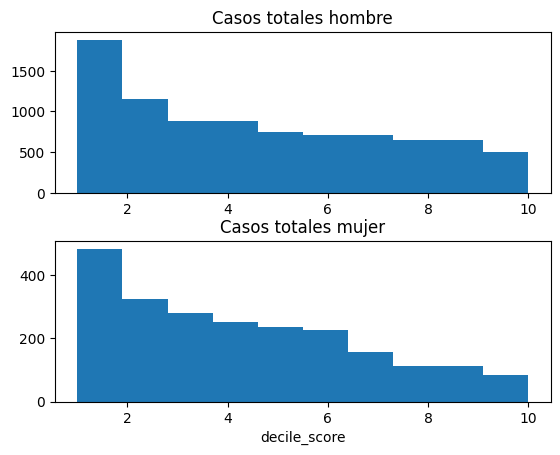

In [225]:
plt.subplot(211)
plt.hist(df_filtrado['decile_score'] [df_filtrado.sex == 'Male'])
plt.title('Casos totales hombre')

plt.subplot(212)
plt.hist(df_filtrado['decile_score'][df_filtrado.sex == 'Female'])
plt.xlabel('decile_score')
plt.title('Casos totales mujer')

plt.subplots_adjust(hspace=0.3)
plt.show()

Vemos que en general las puntuaciones para los hombres son mayores, aunque, es también verdad que hay más casos. 

Veremos una comparación más homogénea, comparando la distribución de decile_score, diferenciando por sexo.

In [226]:
total_sexo = df_filtrado.groupby("sex").count()["name"]
total_sexo

sex
Female    2263
Male      8764
Name: name, dtype: int64

In [227]:
decile_sexo = df_filtrado.groupby(["sex", "decile_score"]).count()["name"]
decile_sexo

sex     decile_score
Female  1.0              483
        2.0              324
        3.0              279
        4.0              251
        5.0              235
        6.0              226
        7.0              157
        8.0              112
        9.0              111
        10.0              85
Male    1.0             1885
        2.0             1154
        3.0              888
        4.0              879
        5.0              747
        6.0              715
        7.0              705
        8.0              646
        9.0              650
        10.0             495
Name: name, dtype: int64

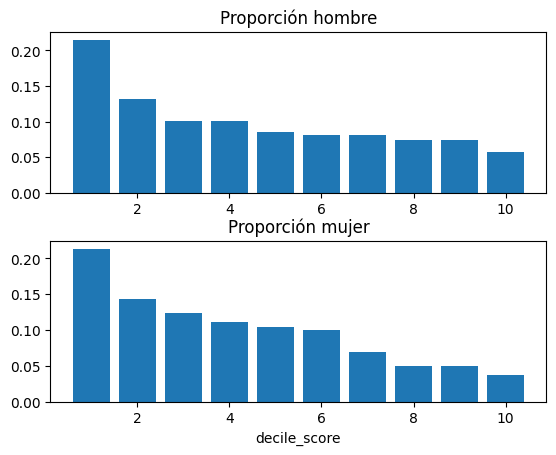

In [228]:
plt.subplot(211)
plt.bar(x=range(1, 11), height=(decile_sexo/total_sexo)["Male"])
plt.title('Proporción hombre')

plt.subplot(212)
plt.bar(x=range(1, 11), height=(decile_sexo/total_sexo)["Female"])
plt.title('Proporción mujer')
plt.xlabel('decile_score')


plt.subplots_adjust(hspace=0.3)
plt.show()

Vemos que la proporción entre los valores más bajos de decile_score son parecidos. Sin embargo, los valores más altos son mucho más abundantes en el caso de los hombres.

Realizaremos directamente la proporción para el caso de la raza

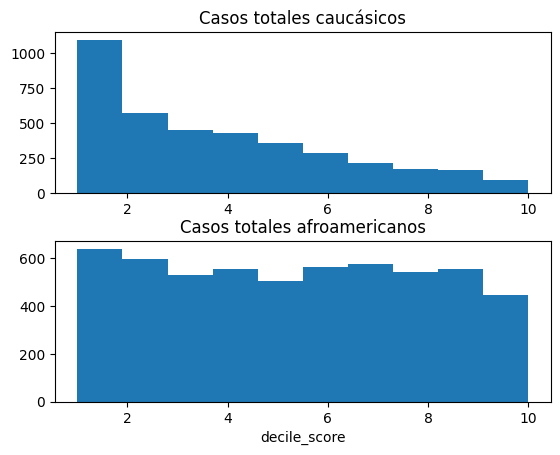

In [229]:
plt.subplot(211)
plt.hist(df_filtrado['decile_score'] [df_filtrado.race == 'Caucasian'])
plt.title('Casos totales caucásicos')

plt.subplot(212)
plt.hist(df_filtrado['decile_score'][df_filtrado.race == 'African-American'])
plt.xlabel('decile_score')
plt.title('Casos totales afroamericanos')

plt.subplots_adjust(hspace=0.3)
plt.show()

In [230]:
total_raza = df_filtrado.groupby("race").count()["name"]
total_raza

race
African-American    5498
Asian                 53
Caucasian           3811
Hispanic            1009
Native American       36
Other                620
Name: name, dtype: int64

In [231]:
decile_raza = df_filtrado.groupby(["race", "decile_score"]).count()["name"]
decile_raza

race              decile_score
African-American  1.0              640
                  2.0              595
                  3.0              528
                  4.0              554
                  5.0              506
                  6.0              561
                  7.0              575
                  8.0              541
                  9.0              553
                  10.0             445
Asian             1.0               26
                  2.0                8
                  3.0                6
                  4.0                0
                  5.0                4
                  6.0                4
                  7.0                1
                  8.0                3
                  9.0                0
                  10.0               1
Caucasian         1.0             1094
                  2.0              571
                  3.0              451
                  4.0              426
                  5.0            

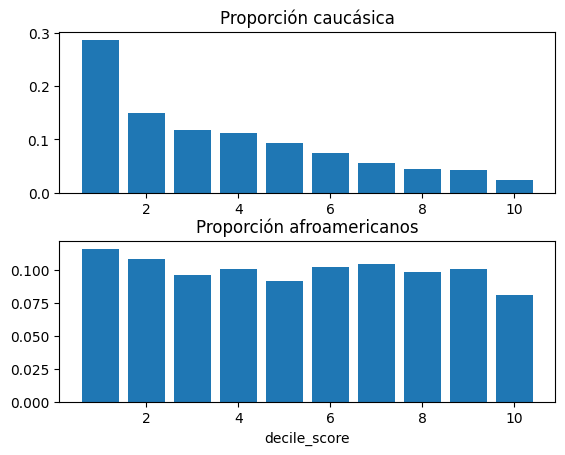

In [232]:
plt.subplot(211)
plt.bar(x=range(1, 11), height=(decile_raza/total_raza)["Caucasian"])
plt.title('Proporción caucásica')

plt.subplot(212)
plt.bar(x=range(1, 11), height=(decile_raza/total_raza)["African-American"])
plt.title('Proporción afroamericanos')
plt.xlabel('decile_score')


plt.subplots_adjust(hspace=0.3)
plt.show()

En este caso es mucho más claro que las proporciones son distintas. Si bien es verdad que hay más casos de afroamericanos, parece evidente que el reparto no es del todo justo...

### 5. ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?

Volvemos a ustilizar nuestras matrices de confusión

In [233]:
recid_tabla = pd.crosstab(df_filtrado['pred_recid'], df_filtrado['is_recid'], rownames=['Predicción'], colnames=['Real'])
recid_tabla

Real,False,True
Predicción,,
False,5868,2198
True,1458,1503


In [234]:
recid_violent_tabla = pd.crosstab(df_filtrado['pred_v_recid'], df_filtrado['is_violent_recid'], rownames=['Predicción'], colnames=['Real'])
recid_violent_tabla

Real,False,True
Predicción,,
False,8703,616
True,1442,266


In [235]:
def score_df(data_frame: pd.DataFrame):
    TP_recid = data_frame.iloc[1][1]
    TN_recid = data_frame.iloc[0][0]
    FP_recid = data_frame.iloc[1][0]
    FN_recid = data_frame.iloc[0][1]

    sensibilidad = TP_recid / (TP_recid + FN_recid)
    especificidad = TN_recid / (TN_recid + FP_recid)
    tasa_falsos_positivos = 1 - especificidad
    precision = TP_recid / (TP_recid + FP_recid)
    exactitud = (TP_recid + TN_recid) / df_filtrado['name'].count()
    F_score = 2 * precision * sensibilidad / (precision + sensibilidad)

    scores = {'sensibilidad': sensibilidad, 'especificidad': especificidad, 'tasa_falsos_positivos': tasa_falsos_positivos, 'precision': precision, \
              'exactitud': exactitud, 'F_score': F_score}
    return scores

In [236]:
score_df(recid_tabla)

{'sensibilidad': 0.40610645771413134,
 'especificidad': 0.800982800982801,
 'tasa_falsos_positivos': 0.19901719901719905,
 'precision': 0.5075987841945289,
 'exactitud': 0.6684501677700191,
 'F_score': 0.45121585109576706}

In [237]:
score_df(recid_violent_tabla)

{'sensibilidad': 0.30158730158730157,
 'especificidad': 0.8578610152784623,
 'tasa_falsos_positivos': 0.14213898472153774,
 'precision': 0.1557377049180328,
 'exactitud': 0.8133671896254647,
 'F_score': 0.20540540540540542}

Las conclusiones no son claras, al haber muchos menos casos con violencia es más fácil que prediga peor los casos postivos... en mi opinión es mejor que el sistema tenga falsos positivos a que tenga falsos negativos. Más vale prevenir, que curar, por lo que habria que mirar con que exactitud predice bien los casos negativos. 

Yo creo que las mejores métricas para comparar son la exactitud y la especificidad. En ese caso claramente ganan los casos con violencia. 

Como conclusión: si el sistema dice que una persona no va a reincidir de manera violenta es muy probable que así sea. Esto no se cumple tanto con los casos no violentos.